<a href="https://colab.research.google.com/github/Nhat260501/Tuan6/blob/main/6_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=446d0c097f6092b7a8353b7744059540855432d233367681d0f9c858065fc3fa
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


48.914728682170505


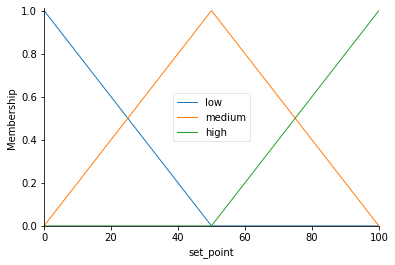

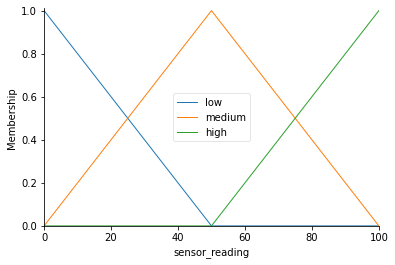

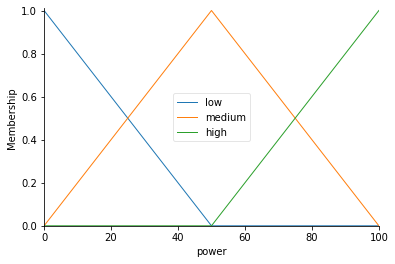

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo biến cho set point, sensor reading và power
set_point = ctrl.Antecedent(np.arange(0, 101, 1), 'set_point')
sensor_reading = ctrl.Antecedent(np.arange(0, 101, 1), 'sensor_reading')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

# Định nghĩa giá trị(low,medium,high) trong set point, sensor reading và power
set_point['low'] = fuzz.trimf(set_point.universe, [0, 0, 50])
set_point['medium'] = fuzz.trimf(set_point.universe, [0, 50, 100])
set_point['high'] = fuzz.trimf(set_point.universe, [50, 100, 100])

sensor_reading['low'] = fuzz.trimf(sensor_reading.universe, [0, 0, 50])
sensor_reading['medium'] = fuzz.trimf(sensor_reading.universe, [0, 50, 100])
sensor_reading['high'] = fuzz.trimf(sensor_reading.universe, [50, 100, 100])

power['low'] = fuzz.trimf(power.universe, [0, 0, 50])
power['medium'] = fuzz.trimf(power.universe, [0, 50, 100])
power['high'] = fuzz.trimf(power.universe, [50, 100, 100])

# Hiển thị set point, sensor reading và power
set_point.view()
sensor_reading.view()
power.view()

# Định nghĩa các quy tắc ( Rule)
rule1 = ctrl.Rule(set_point['low'] & sensor_reading['low'], power['high'])
rule2 = ctrl.Rule(set_point['low'] & sensor_reading['medium'], power['medium'])
rule3 = ctrl.Rule(set_point['low'] & sensor_reading['high'], power['low'])
rule4 = ctrl.Rule(set_point['medium'] & sensor_reading['low'], power['medium'])
rule5 = ctrl.Rule(set_point['medium'] & sensor_reading['medium'], power['medium'])
rule6 = ctrl.Rule(set_point['medium'] & sensor_reading['high'], power['low'])
rule7 = ctrl.Rule(set_point['high'] & sensor_reading['low'], power['high'])
rule8 = ctrl.Rule(set_point['high'] & sensor_reading['medium'], power['medium'])
rule9 = ctrl.Rule(set_point['high'] & sensor_reading['high'], power['low'])

# Công thức suy luận 
engine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
engine = ctrl.ControlSystemSimulation(engine_ctrl)

# Khai báo giá trị input cho set_point và sensor_reading
engine.input['set_point'] = 70
engine.input['sensor_reading'] = 60

# Tính giá trị output 
engine.compute()

# Xuất giá trị output ra màng hình
print(engine.output['power'])